In [23]:
import pandas as pd
import json
import numpy as np

import matplotlib.pyplot as plt
from ast import literal_eval
from dotenv import load_dotenv 
import os
from PIL import Image

In [24]:
# loading variables from .env file
load_dotenv("../../../private_data/.env") 

# PARENT gets us to the root of the project
PARENT = "./../../../"

FOLDER_TABLE = PARENT + os.getenv("FOLDER_TABLE")
FILE_FABRITIUS_DATA = PARENT + os.getenv("FILE_FABRITIUS_DATA")
FILE_FABRITIUS_DATA_FILTERED = PARENT + os.getenv("FILE_FABRITIUS_DATA_FILTERED")
FILE_FABRITIUS_DATA_FILTERED_DOWNLOADED = PARENT + os.getenv("FILE_FABRITIUS_DATA_FILTERED_DOWNLOADED")
FOLDER_FIGURES = PARENT + os.getenv("FOLDER_FIGURES")
IMAGES_FOLDER = PARENT + os.getenv("IMAGES_FOLDER")

RECORD_IDS_TESTING_SET = PARENT + os.getenv("RECORD_IDS_TESTING_SET")
RECORD_IDS_VALIDATION_SET = PARENT + os.getenv("RECORD_IDS_VALIDATION_SET")
RECORD_IDS_TRAINING_SET = PARENT + os.getenv("RECORD_IDS_TRAINING_SET")

WRITTEN_CAPTIONS_TESTING_SET = PARENT + os.getenv("WRITTEN_CAPTIONS_TESTING_SET")
WRITTEN_CAPTIONS_VALIDATION_SET = PARENT + os.getenv("WRITTEN_CAPTIONS_VALIDATION_SET")
WRITTEN_CAPTIONS_TRAINING_SET = PARENT + os.getenv("WRITTEN_CAPTIONS_TRAINING_SET")

DB_INPUT_ARTPIECES = PARENT + os.getenv("DB_INPUT_ARTPIECES")
DB_INPUT_ARTISTS = PARENT + os.getenv("DB_INPUT_ARTISTS")

BENCHMARK_1 = PARENT + os.getenv("BENCHMARK_1")

In [25]:
models_name = [
    "basic-mini",
    "basic-base",
    "basic-large",
    "february_finetuned",
    "march_finetuned",
    "art-mini",
    "art-base",
    "art-large",
]
data = {}
for model_name in models_name:
    data[model_name] = pd.read_csv(f"../../benchmarks/benchmark_3/benchmark_results_{model_name}.csv")

data["art-base"]

,lang,average_position,mrr,recall@1,recall@3,recall@5,recall@10,nDCG@1,nDCG@3,nDCG@5,nDCG@10
0,fr,3.436364,0.748031,0.654545,0.793939,0.872727,0.909091,0.654545,0.738526,0.771395,0.783396
1,en,1.800000,0.850226,0.763636,0.921212,0.951515,0.987879,0.763636,0.859088,0.872139,0.883806
2,nl,3.684848,0.728751,0.618182,0.806061,0.866667,0.933333,0.618182,0.729579,0.754883,0.776093


In [26]:
# Merge all the dataframes
df_all = pd.DataFrame()
for model_name in models_name:
    df = data[model_name]
    df["model_name"] = model_name
    df_all = pd.concat([df_all, df], ignore_index=True)

df_all

,lang,average_position,mrr,recall@1,recall@3,recall@5,recall@10,nDCG@1,nDCG@3,nDCG@5,nDCG@10,model_name
0,fr,11.375758,0.545768,0.436364,0.606061,0.672727,0.800000,0.436364,0.531528,0.559443,0.599319,basic-mini
1,en,2.939394,0.734288,0.606061,0.854545,0.896970,0.939394,0.606061,0.750934,0.768940,0.782358,basic-mini
2,nl,27.012121,0.287794,0.169697,0.321212,0.375758,0.503030,0.169697,0.261325,0.284019,0.325857,basic-mini
3,fr,7.975758,0.530955,0.400000,0.612121,0.696970,0.800000,0.400000,0.521137,0.556352,0.588161,basic-base
4,en,2.866667,0.779322,0.654545,0.896970,0.915152,0.939394,0.654545,0.801944,0.809243,0.817631,basic-base
5,nl,16.921212,0.394519,0.266667,0.454545,0.521212,0.648485,0.266667,0.376476,0.403860,0.443780,basic-base
6,fr,8.012121,0.545605,0.400000,0.636364,0.715152,0.812121,0.400000,0.538020,0.571155,0.603442,basic-large
7,en,3.078788,0.763650,0.648485,0.842424,0.903030,0.945455,0.648485,0.767673,0.792712,0.806218,basic-large
8,nl,18.587879,0.386170,0.266667,0.424242,0.503030,0.624242,0.266667,0.359738,0.392342,0.430661,basic-large
9,fr,4.024242,0.713693,0.606061,0.793939,0.848485,0.927273,0.606061,0.714283,0.736712,0.762668,february_finetuned


In [27]:
lang_to_label = {
    "fr": "French",
    "en": "English",
    "nl": "Dutch",
}

In [28]:
roundFactor = 4

Figure saved to:  ./../../.././public/figures/tri_mrr_per_lang_b3.pdf


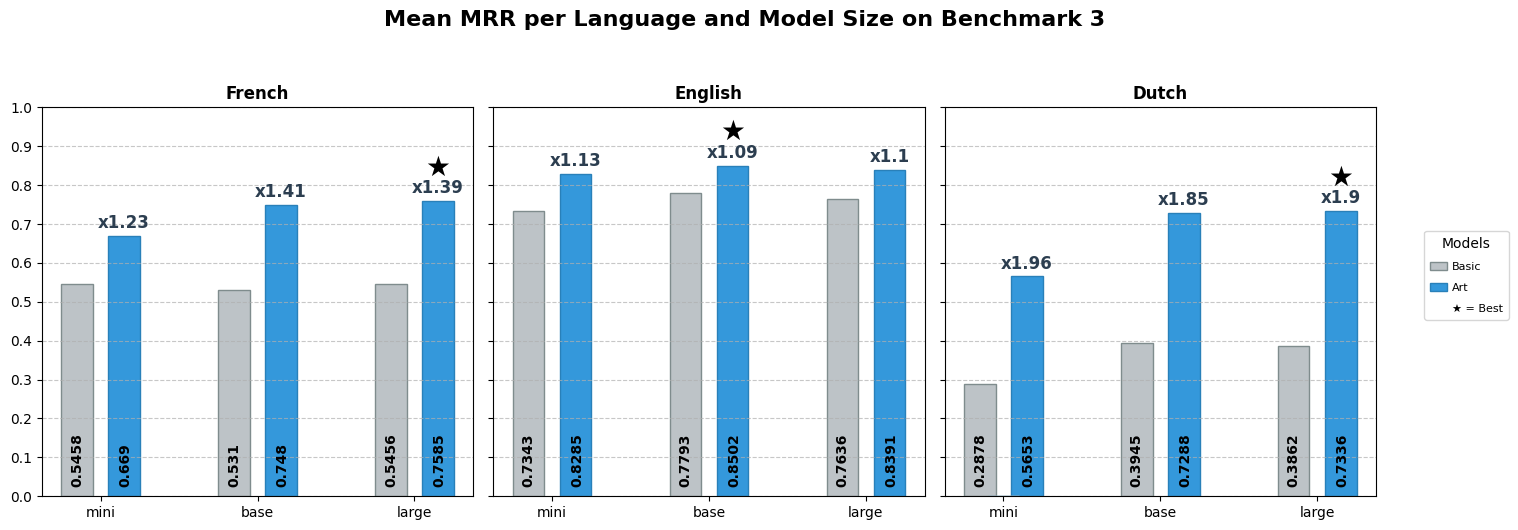

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

df_all_kept_models = df_all[df_all["model_name"].str.contains("art|basic")]

best_size_per_lang = {}
for langIndex, lang in enumerate(["fr", "en", "nl"]):
    art_result_for_lang = df_all_kept_models[df_all_kept_models["lang"] == lang]

    # Get the model_name with the highest mrr in art_result_for_lang
    best_model_size = art_result_for_lang.loc[art_result_for_lang["mrr"].idxmax()]

    best_size_per_lang[lang] = best_model_size["model_name"]

for langIndex, lang in enumerate(["fr", "en", "nl"]):
    result_for_lang = df_all_kept_models[df_all_kept_models["lang"] == lang]
    
    ax = axs[langIndex]

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    for model_size_x, model_size in enumerate(["mini", "base", "large"]):
        base_result = result_for_lang.loc[result_for_lang["model_name"] == f"basic-{model_size}"]["mrr"].values[0]
        art_result = result_for_lang.loc[result_for_lang["model_name"] == f"art-{model_size}"]["mrr"].values[0]

        isArtBest = best_size_per_lang[lang] == f"art-{model_size}"

        ax.bar(
            model_size_x - 0.15,
            base_result,
            width=0.2,
            color="#bdc3c7",
            edgecolor="#7f8c8d"
        )
        # Add the value at the bottom of the bar
        ax.text(
            model_size_x - 0.15,
            0.025,
            str(round(base_result, roundFactor)),
            ha='center',
            va='bottom',
            fontsize=10,
            color="black",
            rotation=90,
            fontweight='bold'
        )

        ax.bar(
            model_size_x + 0.15,
            art_result,
            width=0.2,
            color="#3498db",
            edgecolor="#2980b9",
        )
        # Add the value at the bottom of the bar
        ax.text(
            model_size_x + 0.16,
            0.025,
            str(round(art_result, roundFactor)),
            ha='center',
            va='bottom',
            fontsize=10,
            color="black",
            rotation=90,
            fontweight='bold',
        )
        # Add a star above the bar if art_result is the best
        if isArtBest:
            ax.text(
                model_size_x + 0.15,
                art_result + 0.05,
                "★",
                ha='center',
                va='bottom',
                fontsize=20,
                color="black",
                fontweight='bold'
            )

        # Add a text above the art_result bar
        xDifference = round(art_result/base_result, 2)
        xDifference = f"x{xDifference}"
        ax.text(
            model_size_x + 0.15,
            art_result + 0.01,
            xDifference,
            ha='center',
            va='bottom',
            fontsize=12,
            color="#2c3e50",
            fontweight='bold'
        )


    ax.set_title(lang_to_label[lang], fontsize=12, fontweight='bold')
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["mini", "base", "large"])
    ax.set_ylim(0, 1)

    y_ticks = np.arange(0, 1.1, 0.1)
    ax.set_yticks(y_ticks)

ax = axs[2]
ax.bar(0,0, width=0.2, color="#bdc3c7", edgecolor="#7f8c8d", label="Basic")
ax.bar(0,0, width=0.2, color="#3498db", edgecolor="#2980b9", label="Art")
# Add a label for the star
ax.bar(0,0, width=0.2, color="#fff", edgecolor="#fff", label="★ = Best")

ax.legend(
    loc="lower right",
    fontsize=8,
    title="Models",
    markerscale=1.5,
    handlelength=1.5,
    handletextpad=0.5,
    borderpad=0.5,
    labelspacing=1,
    bbox_to_anchor=(1.32, 0.44)
)

plt.suptitle("Mean MRR per Language and Model Size on Benchmark 3", fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.savefig(FOLDER_FIGURES + "tri_mrr_per_lang_b3.pdf", dpi=300)
print("Figure saved to: ", FOLDER_FIGURES + "tri_mrr_per_lang_b3.pdf")
plt.show()

In [41]:
import write_latex as WL

def get_table_lang(lang):
    table_LANG = df_all.copy()
    table_LANG = table_LANG.loc[table_LANG["lang"] == lang]
    # Remove columns
    table_LANG = table_LANG.drop(columns=["lang", "nDCG@1"])
    # Columns for training_data
    table_LANG["training_data"] = [
        "N/A",
        "N/A",
        "N/A",
        "cap-FR-1",
        "cap-FR-2 \& ico-FR",
        "cap-TRI \& ico-TRI",
        "cap-TRI \& ico-TRI",
        "cap-TRI \& ico-TRI",
    ]
    table_LANG["pretrained_model"] = [
        "B/32",
        "L/14",
        "L/14@336px",
        "L/14",
        "L/14",
        "B/32",
        "L/14",
        "L/14@336px",
    ]
    # Round specific columns
    round_factor = 3
    numeric_columns = [
        "average_position",
        "mrr",
        "recall@1",
        "recall@3",
        "recall@5",
        "recall@10",
        "recall@3",
        "nDCG@5",
        "nDCG@3",
        "nDCG@10",
    ]
    for col in numeric_columns:
        table_LANG[col] = table_LANG[col].round(round_factor)
        if col == "average_position":
            best_value = table_LANG[col].min()
        else:
            best_value = table_LANG[col].max() 
        
        # Bold the value if it is the best in the column
        table_LANG[col] = table_LANG[col].apply(lambda x: f"\\textbf{{{x}}}" if x == best_value else str(x))
    # For each numeric column, bold the value
    # Reorder columns
    table_LANG = table_LANG[["training_data", "pretrained_model", "model_name", "average_position", "mrr", "recall@1", "recall@3", "recall@5", "recall@10", "nDCG@3", "nDCG@5", "nDCG@10"]]
    # Rename columns
    table_LANG = table_LANG.rename(columns={
        "training_data": "Dataset",
        "pretrained_model": "ViT",
        "model_name": "Model",
        "average_position": "Avg. Pos.",
        "mrr": "MRR",
        "recall@1": "Recall@1",
        "recall@3": "Recall@3",
        "recall@5": "Recall@5",
        "recall@10": "Recall@10",
        "nDCG@3": "nDCG@3",
        "nDCG@5": "nDCG@5",
        "nDCG@10": "nDCG@10",
    })
    # drop index
    table_LANG = table_LANG.reset_index(drop=True)
    return table_LANG

tables = {}
for lang in ["fr", "en", "nl"]:
    tables[lang] = get_table_lang(lang)

print(WL.get_latex_summary_table(tables["nl"]))


        \begin{table}[]
        \centering
        \resizebox{\columnwidth}{!}{%
        \begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|}
        \hline
        \textbf{Dataset} & \textbf{ViT} & \textbf{Model} & \textbf{Avg. Pos.} & \textbf{MRR} & \textbf{Recall@1} & \textbf{Recall@3} & \textbf{Recall@5} & \textbf{Recall@10} & \textbf{nDCG@3} & \textbf{nDCG@5} & \textbf{nDCG@10} \\ \hline
        \multirow{3}{*}{N/A} & B/32 & basic-mini & 27.012 & 0.288 & 0.17 & 0.321 & 0.376 & 0.503 & 0.261 & 0.284 & 0.326 \\ \cline{2-12} 
        & L/14 & basic-base & 16.921 & 0.395 & 0.267 & 0.455 & 0.521 & 0.648 & 0.376 & 0.404 & 0.444 \\ \cline{2-12} 
        & L/14@336px & basic-large & 18.588 & 0.386 & 0.267 & 0.424 & 0.503 & 0.624 & 0.36 & 0.392 & 0.431 \\ \hline
        cap-FR-1 & \multirow{2}{*}{L/14} & february\_finetuned & 9.297 & 0.54 & 0.412 & 0.612 & 0.691 & 0.782 & 0.529 & 0.561 & 0.591 \\ \cline{1-1} \cline{3-12} 
        cap-FR-2 \& ico-FR &  & march\_finetuned & 7.139 & 0.564 & 0.424 & 0.